In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    

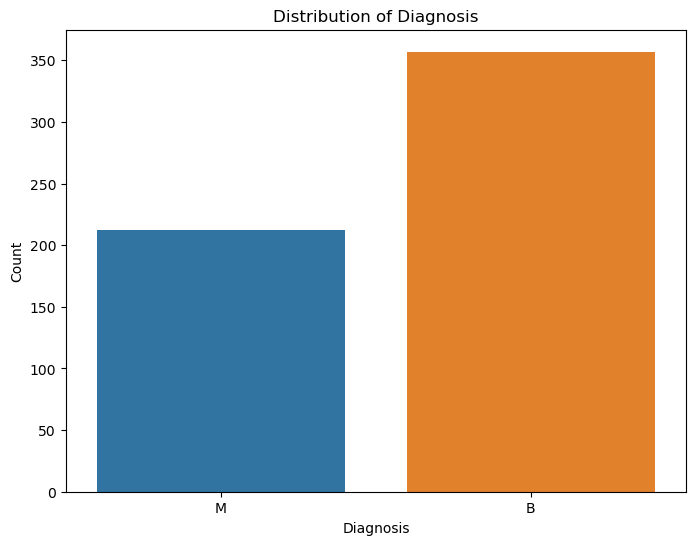

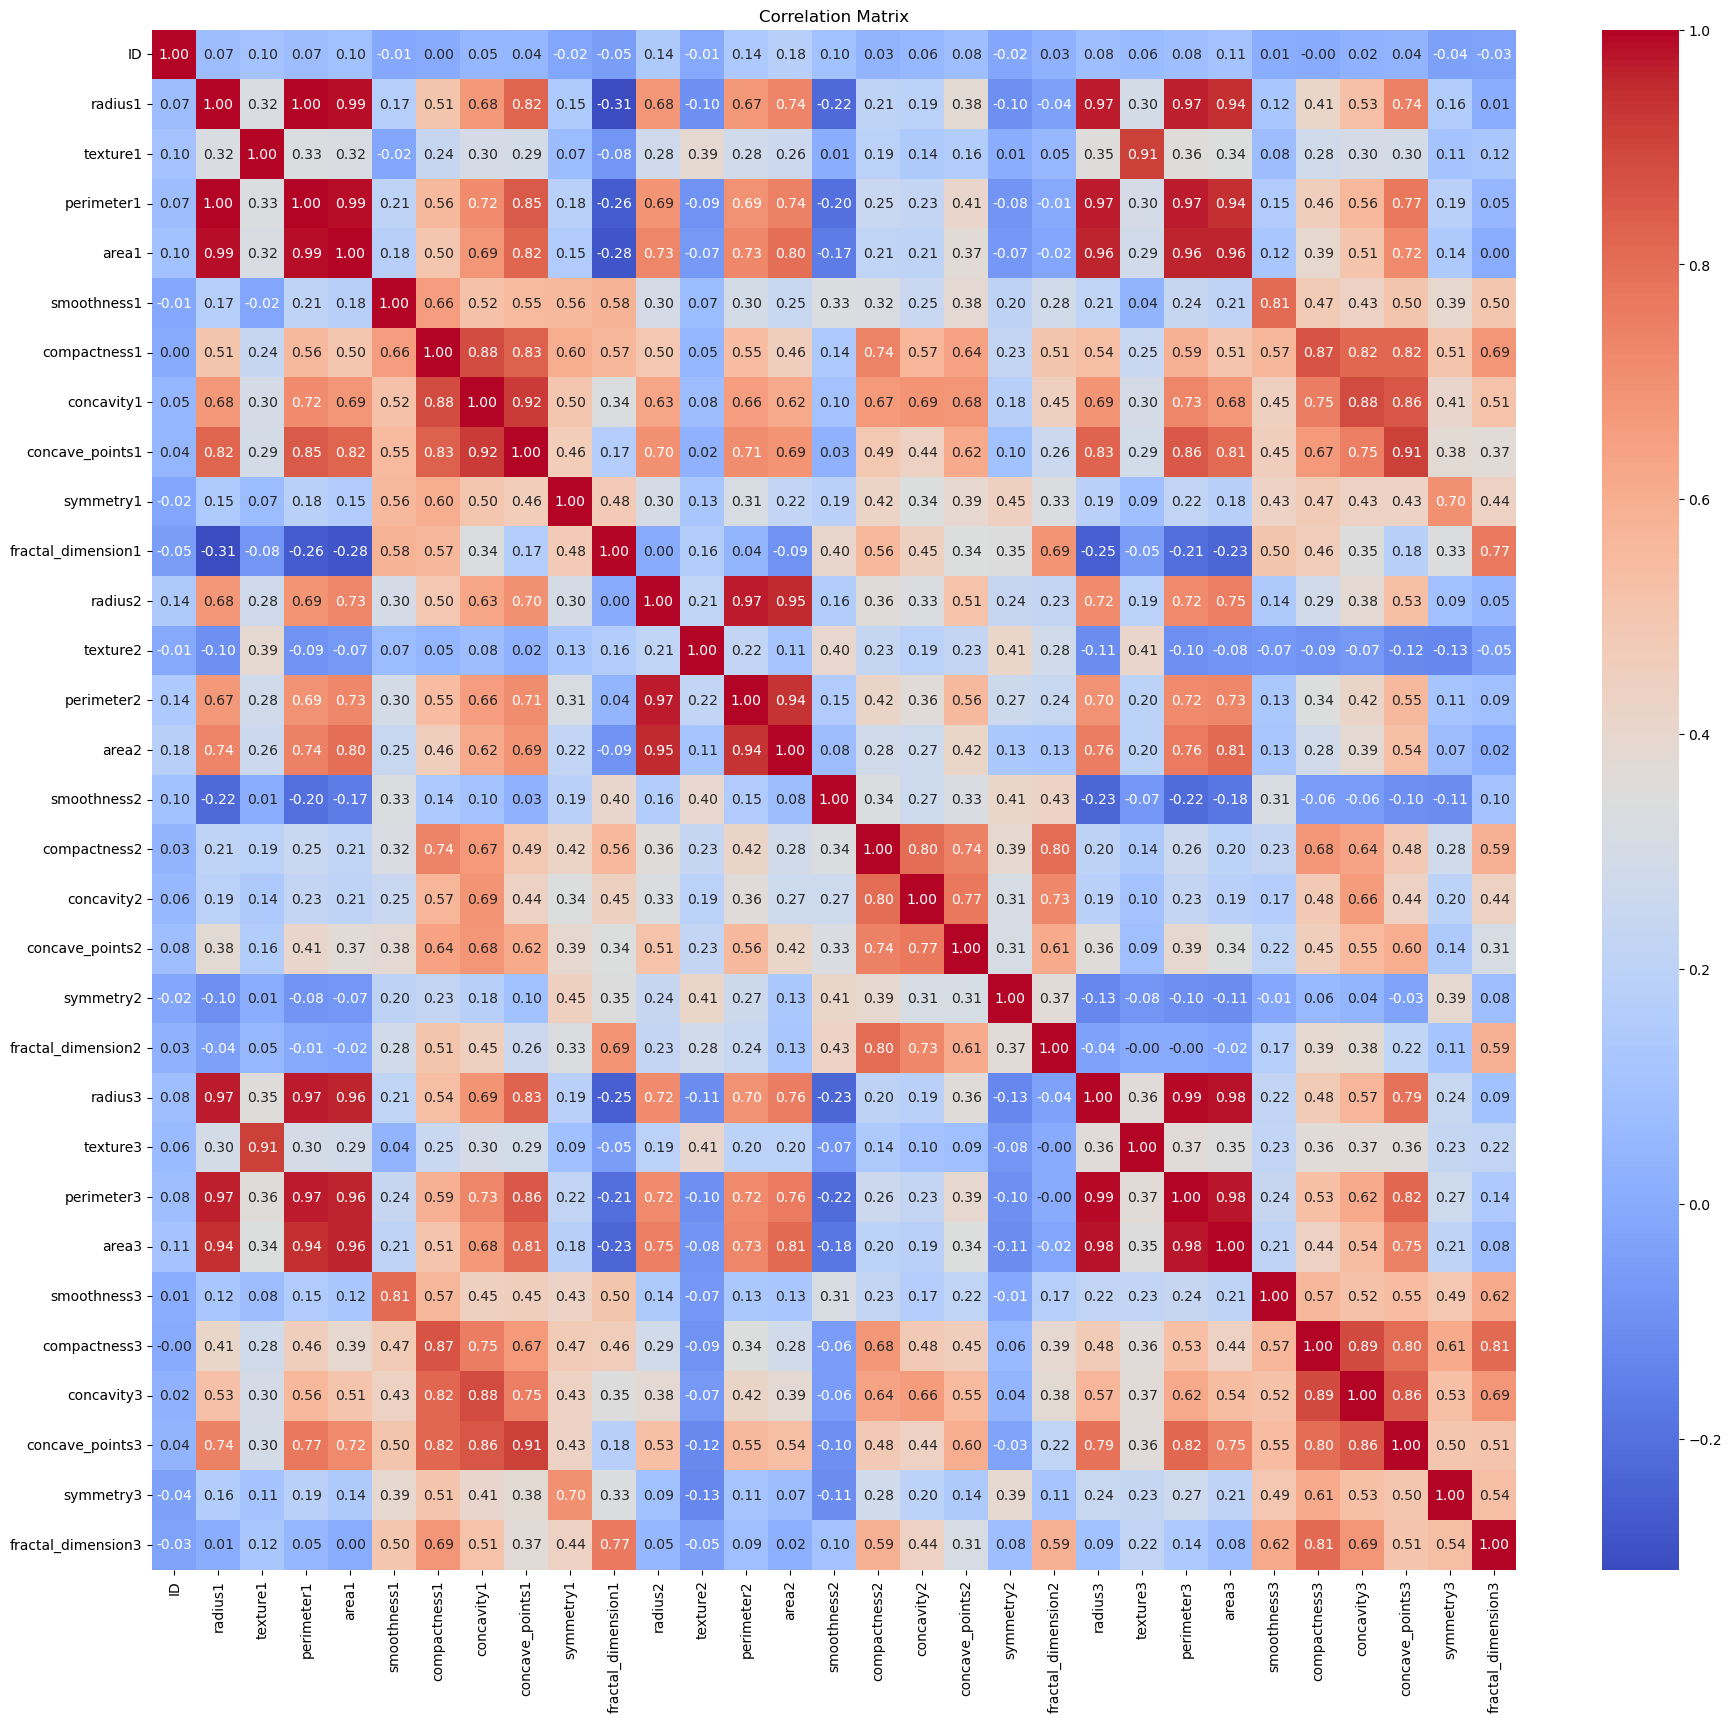

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
df = breast_cancer_wisconsin_diagnostic.data.original
data = df.copy()

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Visualize the distribution of diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(22, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


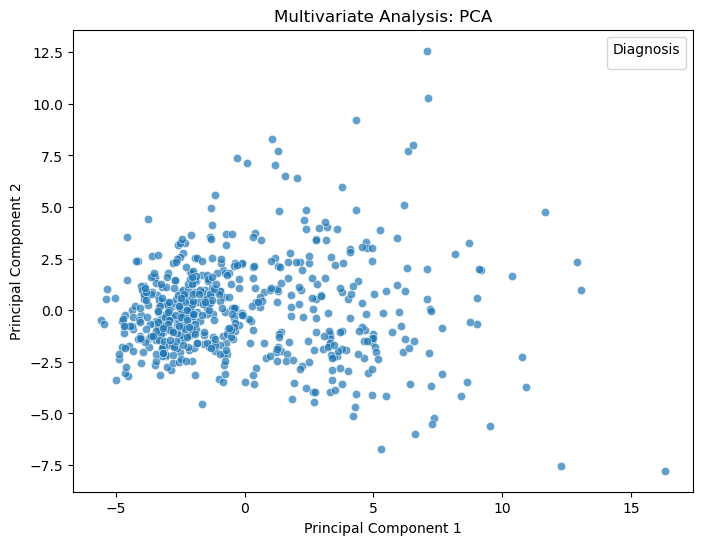

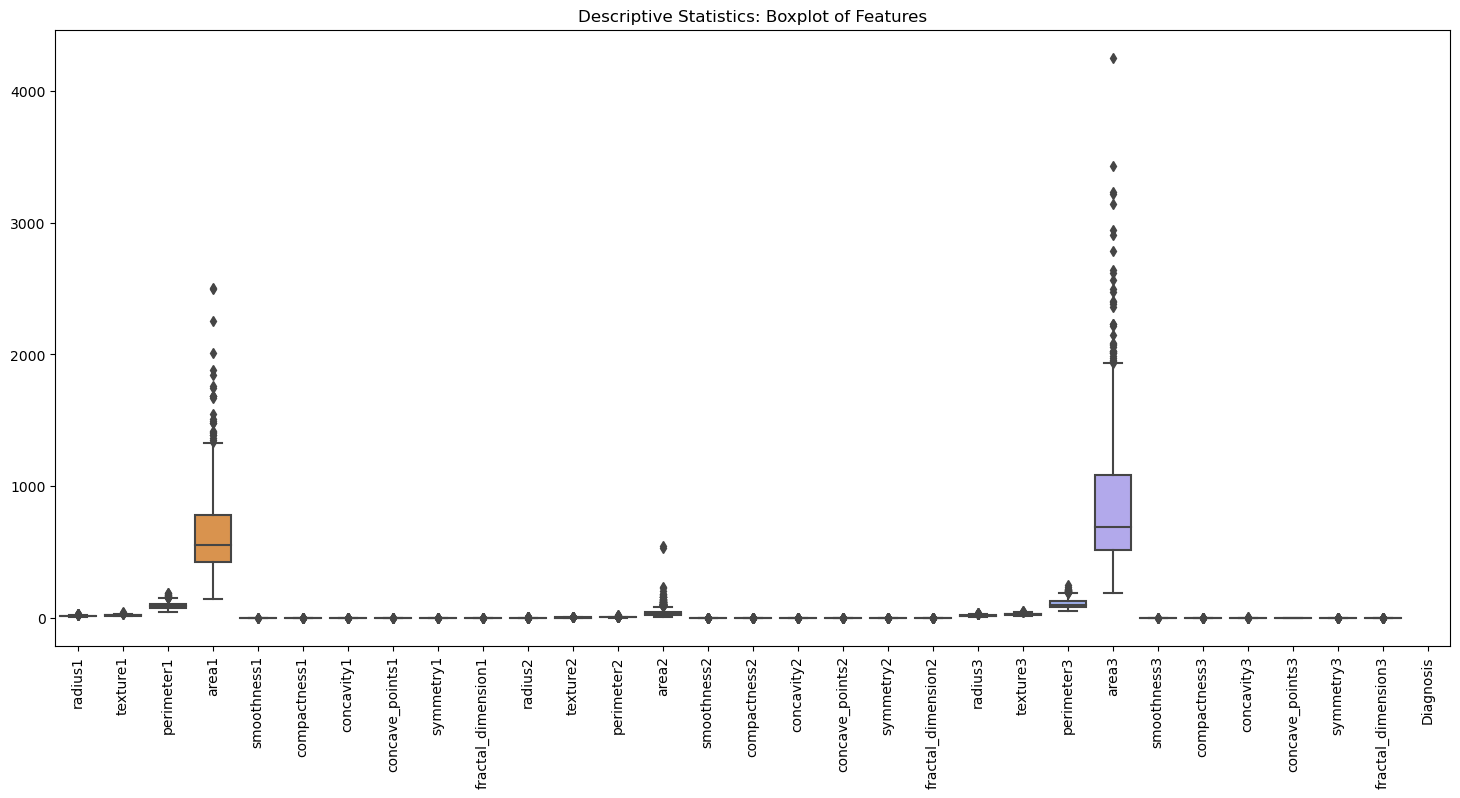

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop ID column (not useful for analysis)
data.drop('ID', axis=1, inplace=True)

# Convert Diagnosis (M/B) to binary labels (1/0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target variable (y)
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']


# Multivariate Analysis: Principal Component Analysis (PCA)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title('Multivariate Analysis: PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

# Descriptive Statistics Visualization
plt.figure(figsize=(18, 8))
sns.boxplot(data=data)
plt.title('Descriptive Statistics: Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

Evaluation Metrics:
Accuracy: 0.9386
Precision: 0.9091
Recall: 0.9302
F1 Score: 0.9195
ROC AUC Score: 0.9369


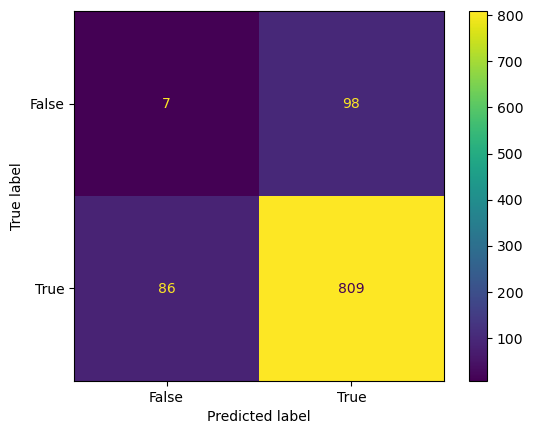

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Load data (as pandas DataFrame)
df = breast_cancer_wisconsin_diagnostic.data.original
data = df.copy()

# Convert Diagnosis (M/B) to binary labels (1/0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target variable (y)
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier on the labeled training data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Check if there are unlabeled instances in the test set
if y_test.isnull().any():
    # Self-training: Label unlabeled instances using the trained model
    unlabeled_instances = X_test[y_test.isnull()]
    unlabeled_predictions = decision_tree.predict(unlabeled_instances)
    X_labeled = pd.concat([X_train, X_test[y_test.notnull()]])
    y_labeled = pd.concat([y_train, y_test[y_test.notnull()]])
    X_labeled = pd.concat([X_labeled, unlabeled_instances])
    y_labeled = pd.concat([y_labeled, pd.Series(unlabeled_predictions, index=unlabeled_instances.index)])
else:
    # No unlabeled instances found, use the original training data for self-training
    X_labeled, y_labeled = X_train, y_train

# Retrain the decision tree classifier on the labeled data (including pseudo-labeled instances)
decision_tree.fit(X_labeled, y_labeled)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

#Visualize confusion matrix
actual = numpy.random.binomial(1,.9, size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()